In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [14]:
# 定义模型
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 编译模型
model.compile(optimizer=tf.optimizers.Adam(),
              loss=tf.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [15]:
# 加载数据集
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# 数据归一化
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

# 训练模型，并记录指标
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3145 - accuracy: 0.9077 - val_loss: 0.1627 - val_accuracy: 0.9530
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1389 - accuracy: 0.9589 - val_loss: 0.1303 - val_accuracy: 0.9609
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1000 - accuracy: 0.9696 - val_loss: 0.1021 - val_accuracy: 0.9701
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0784 - accuracy: 0.9760 - val_loss: 0.1004 - val_accuracy: 0.9703
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0624 - accuracy: 0.9814 - val_loss: 0.1030 - val_accuracy: 0.9685


In [16]:
# 评估模型
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0959 - accuracy: 0.9709
Test accuracy: 0.9708999991416931


In [17]:
import matplotlib.pyplot as plt

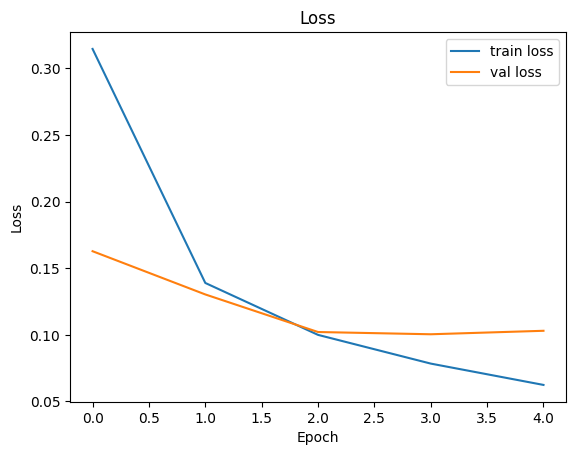

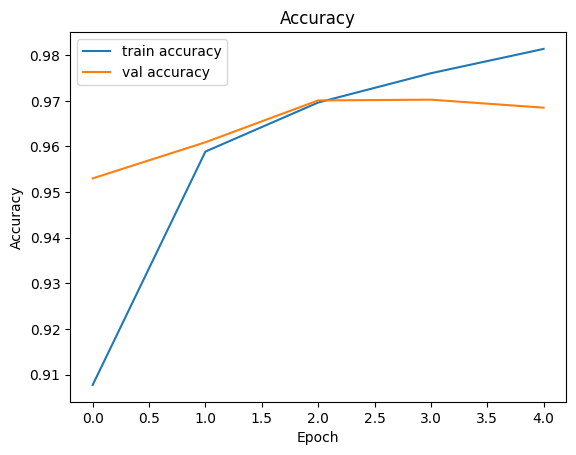

In [18]:
# 绘制训练集和验证集的损失
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 绘制训练集和验证集的准确度
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()